### The goal is to use the images stored in this folder and to design an algorithm that identifies the visibility of the card in the photo
#### 1.FULL_VISIBILITY
#### 2.PARTIAL_VISIBILITY
#### 3.NO_VISIBILITY

In [1]:
import cv2

In [2]:

import random,os,gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## Data Exploration 

In [3]:
labels= pd.read_csv('gicsd_labels.csv')
labels

,IMAGE_FILENAME,LABEL
0,GICSD_1_0_3.png,FULL_VISIBILITY
1,GICSD_1_0_13.png,FULL_VISIBILITY
2,GICSD_1_1_33.png,PARTIAL_VISIBILITY
3,GICSD_1_1_53.png,FULL_VISIBILITY
4,GICSD_1_2_73.png,FULL_VISIBILITY
...,...,...
795,GICSD_50_7_213.png,NO_VISIBILITY
796,GICSD_50_7_233.png,PARTIAL_VISIBILITY
797,GICSD_50_8_253.png,FULL_VISIBILITY
798,GICSD_50_9_273.png,FULL_VISIBILITY


In [4]:
labels.columns = labels.columns.str.lstrip()

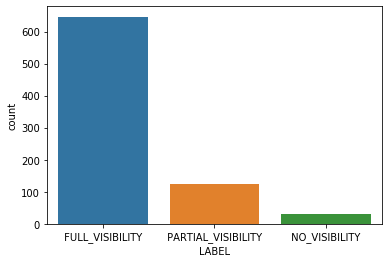

In [5]:
sns.countplot(labels['LABEL'])

In [6]:
full_vis = labels[labels['LABEL']==' FULL_VISIBILITY ']['IMAGE_FILENAME']  
partial_vis = labels[labels['LABEL']==' PARTIAL_VISIBILITY ']['IMAGE_FILENAME']
no_vis = labels[labels['LABEL']==' NO_VISIBILITY ']['IMAGE_FILENAME']

In [7]:
train_dir = 'images'

images_full =    ['images/{}'.format(i) for i in os.listdir(train_dir) if i in full_vis ] 
images_partial = ['images/{}'.format(i) for i in os.listdir(train_dir) if i in partial_vis ] 
images_no =      ['images/{}'.format(i) for i in os.listdir(train_dir) if i in no_vis ]  





In [8]:
os.curdir

'.'

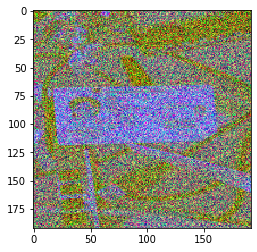

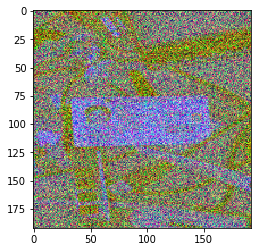

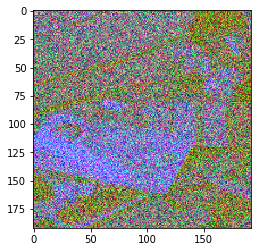

In [9]:
import matplotlib.image as mpimg
for ima in labels.IMAGE_FILENAME[0:3]:
    img=mpimg.imread(train_dir+'/'+ima)
    imgplot = plt.imshow(img)
    plt.show()

In [11]:
import pandas as pd

In [12]:
labels.head()
labels.columns = labels.columns.str.lstrip()
labels= labels.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
labels.head()

,IMAGE_FILENAME,LABEL
0,GICSD_1_0_3.png,FULL_VISIBILITY
1,GICSD_1_0_13.png,FULL_VISIBILITY
2,GICSD_1_1_33.png,PARTIAL_VISIBILITY
3,GICSD_1_1_53.png,FULL_VISIBILITY
4,GICSD_1_2_73.png,FULL_VISIBILITY


In [13]:
from PIL import Image
def check_image_size(image_path):
    img = Image.open(image_path)
    width, height = img.size
    return width, height
check_image_size('images/')

In [14]:
def get_all_files(filepath, extension):
    import os, glob
    """get list of all files within a directory"""
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.{}'.format(extension)))
        for f in files :
            all_files.append(os.path.abspath(f))
    return all_files
paths_list = get_all_files('images/','png')


In [15]:
def match_filename_to_filepath(filenames_list, paths_list):
    import os
    """returns list of ordered paths to corresponding to filenames list input"""
    ordered_paths = []
    for filename in filenames_list:
        for path in paths_list:
            subdir = os.path.dirname(path)
            name = os.path.basename(path)
            if filename == name:
                ordered_paths.append(
                    os.path.join(subdir,name))
    return ordered_paths

ordered_paths = match_filename_to_filepath(list(labels.IMAGE_FILENAME), paths_list)


In [16]:
labels['PATH'] = pd.Series(ordered_paths)
labels.head()

,IMAGE_FILENAME,LABEL,PATH
0,GICSD_1_0_3.png,FULL_VISIBILITY,C:\Users\DELL\images\GICSD_1_0_3.png
1,GICSD_1_0_13.png,FULL_VISIBILITY,C:\Users\DELL\images\GICSD_1_0_13.png
2,GICSD_1_1_33.png,PARTIAL_VISIBILITY,C:\Users\DELL\images\GICSD_1_1_33.png
3,GICSD_1_1_53.png,FULL_VISIBILITY,C:\Users\DELL\images\GICSD_1_1_53.png
4,GICSD_1_2_73.png,FULL_VISIBILITY,C:\Users\DELL\images\GICSD_1_2_73.png


In [17]:
from shutil import copyfile
import os

def split_image_folder(labels, visibility, dst_path):

    labels = labels.loc[labels['LABEL'] == visibility]
    #dst_up_path = os.path.join(dst_path, directory)
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)
        count = 0
        for index, row in labels.iterrows():
            src = labels.PATH[index]
            out_filename = labels.IMAGE_FILENAME[index]
            dst = '{}/{}'.format(dst_path, out_filename)
            copyfile(src, dst)
            count+=1
        print(f'copied {count} files to {dst_path}')
    else:
        print('already exists! Skipping!')

In [18]:
split_image_folder(labels, 'FULL_VISIBILITY', 'C:/Users/DELL/images/split_folder/full_visibility')
split_image_folder(labels, 'PARTIAL_VISIBILITY', 'C:/Users/DELL/images/split_folder/partial_visibility')
split_image_folder(labels, 'NO_VISIBILITY', 'C:/Users/DELL/images/split_folder/no_visibility')

copied 646 files to C:/Users/DELL/images/split_folder/full_visibility
copied 123 files to C:/Users/DELL/images/split_folder/partial_visibility
copied 31 files to C:/Users/DELL/images/split_folder/no_visibility


In [19]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [20]:
import split_folders
def split_train_val_test(in_dir, out_dir, split_ratio=(.70, .15, .15)):
    split_folders.ratio(in_dir, output=out_dir, seed=1337, ratio=split_ratio)

In [21]:
split_train_val_test('C:/Users/DELL/images/split_folder/', 'C:/Users/DELL/images/train_validate_test')


Copying files: 800 files [00:08, 95.69 files/s] 


In [22]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os

def augment_image(generator, image_path, sample_size, dest_dir):
   
    # load the image
    img = load_img(image_path)
    # convert to numpy array
    img_arr = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(img_arr, 0)
    # prepare iterator
    prefix = os.path.basename(image_path).split('.')[0]
    it = generator.flow(samples, 
                      batch_size=1,  
                      save_to_dir=dest_dir, 
                      save_prefix=prefix, 
                      save_format='png'
                     )
    # generate samples 
    for i in range(sample_size):
        # generate batch of images
        batch = it.next()

Using TensorFlow backend.


In [23]:
# set image data augmentation generator
no_visibility_generator = ImageDataGenerator(
    shear_range=0.3,
    horizontal_flip=True, # random
    vertical_flip=True, # random
    width_shift_range=0.2,
    rotation_range=180,
    brightness_range=[1.0,1.3],
    zoom_range=[0.7,1.0],
    fill_mode = 'reflect'
)

# get list of no_visibility files
no_visibility_training_files = get_all_files(
    'C:/Users/DELL/images/train_validate_test/train/no_visibility/', 
    'png')

# generate 10 x new images for no_visibility
for image_path in no_visibility_training_files:
    augment_image(
        no_visibility_generator, 
        image_path, 
        10, 
        'C:/Users/DELL/images/train_validate_test/train/no_visibility/'
    )

In [24]:
# set image data augmentation generator
partial_visibility_generator = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    brightness_range=[1.0,1.3],
    zoom_range=[0.8, 1],
    fill_mode = 'reflect'
)

#get list of partial_visibility files
partial_visibility_training_files = get_all_files(
    'C:/Users/DELL/images/train_validate_test/train/partial_visibility/', 
    'png')

# generate 5x x new images for partial_visibility
for image_path in partial_visibility_training_files:
    augment_image(
        partial_visibility_generator, 
        image_path, 
        5, 
        'C:/Users/DELL/images/train_validate_test/train/partial_visibility/'
    )

Increases in the training data:

PARTIAL_VISIBILITY
Original split; 86-19-18
After data augmentation; 430-19-18
NO_VISIBILITY
Original split; 21-5-5
After data augmentation; 210-5-5
TOTAL IMAGES: 1333

### Feature Engineering

#### Create a function that transforms an image (in the format of a numpy array) into a single-channel image. Explain the approach used to achieve this. 

In [25]:
import cv2
#convert RGB img to numpy.array
img = cv2.imread('images/GICSD_1_0_3.png')
print ("RGB shape:", img.shape)

# #convert to 1x channel image (greyscale)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale shape:",img_gray.shape)
# # print(img_gray[0:1])

RGB shape: (192, 192, 3)
Grayscale shape: (192, 192)


In [26]:
import cv2
def image_to_gray(infile_path): 
    #convert RGB img to numpy.array
    img = cv2.imread(infile_path) 
    # as cv2 is BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #convert to 1x channel image (greyscale)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

def directory_to_gray(in_dir, out_dir):
    
    # list files
    filepaths = get_all_files(in_dir,'png')
    for img in filepaths:
        img_gray = image_to_gray(img)
        #maintain same filename 
        outfile_path = out_dir + '/' + os.path.basename(img)
        cv2.imwrite(outfile_path, img_gray)

In [27]:
def list_lowest_dirs(directory):
    lowest_dirs = list()
    for root,dirs,_ in os.walk(directory):
        if not dirs:
            lowest_dirs.append(root)   
    return lowest_dirs

In [28]:
in_directory = 'C:/Users/DELL/images/train_validate_test/'
list_lowest_dirs(in_directory)


['C:/Users/DELL/images/train_validate_test/test\\full_visibility',
 'C:/Users/DELL/images/train_validate_test/test\\no_visibility',
 'C:/Users/DELL/images/train_validate_test/test\\partial_visibility',
 'C:/Users/DELL/images/train_validate_test/train\\full_visibility',
 'C:/Users/DELL/images/train_validate_test/train\\no_visibility',
 'C:/Users/DELL/images/train_validate_test/train\\partial_visibility',
 'C:/Users/DELL/images/train_validate_test/val\\full_visibility',
 'C:/Users/DELL/images/train_validate_test/val\\no_visibility',
 'C:/Users/DELL/images/train_validate_test/val\\partial_visibility']

In [29]:
out_directory = 'C:/Users/DELL/images/gray_train_val_test/'
list_lowest_dirs(out_directory)

[]

In [36]:
in_dirs = [
    'C:/Users/DELL/images/train_validate_test/test/partial_visibility',
     'C:/Users/DELL/images/train_validate_test/test/full_visibility',
     'C:/Users/DELL/images/train_validate_test/test/no_visibility',

     'C:/Users/DELL/images/train_validate_test/train/partial_visibility', 
     'C:/Users/DELL/images/train_validate_test/train/full_visibility',
     'C:/Users/DELL/images/train_validate_test/train/no_visibility', 

     'C:/Users/DELL/images/train_validate_test/val/partial_visibility',
     'C:/Users/DELL/images/train_validate_test/val/full_visibility',
     'C:/Users/DELL/images/train_validate_test/val/no_visibility'
]

out_dirs = [
     'C:/Users/DELL/images/gray_train_val_test/test/partial_visibility',
     'C:/Users/DELL/images/gray_train_val_test/test/full_visibility',
     'C:/Users/DELL/images/gray_train_val_test/test/no_visibility',
    
     'C:/Users/DELL/images/gray_train_val_test/train/partial_visibility',
     'C:/Users/DELL/images/gray_train_val_test/train/full_visibility',
     'C:/Users/DELL/images/gray_train_val_test/train/no_visibility',
    
     'C:/Users/DELL/images/gray_train_val_test/val/partial_visibility',
     'C:/Users/DELL/images/gray_train_val_test/val/full_visibility',
     'C:/Users/DELL/images/gray_train_val_test/val/no_visibility'
]

In [37]:
for in_dir, out_dir in zip(in_dirs, out_dirs):
    directory_to_gray(in_dir, out_dir)

In [38]:
for ima in labels[labels.IMAGE_FILENAME=='PARTIAL_VISIBILITY']['IMAGE_FILENAME'][0:3]:
    img=mpimg.imread(train_dir+'/gray_train_val_test/train/partial_visibility/'+ima)
    print(img)
    imgplot = plt.imshow(img)
    plt.show()